#Project Task: Week 1

Class Imbalance Problem:

Perform an EDA on the dataset.

a)  See what a positive, negative, and neutral review looks like

b)  Check the class count for each class. It’s a class imbalance problem.
Convert the reviews in Tf-Idf score.

Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance

#Project Task: Week 2

Tackling Class Imbalance Problem:

Oversampling or undersampling can be used to tackle the class imbalance problem.
In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
Use Tree-based classifiers like Random Forest and XGBoost.

   Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

#Project Task: Week 3

Model Selection:

Apply multi-class SVM’s and neural nets.
Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

#Project Task: Week 4

Applying LSTM:

Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)

   Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

  2. Compare the accuracy of neural nets with traditional ML based algorithms.

  3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive,
  negative, and neutral.

   Hint: Use techniques like Grid Search, Cross-Validation and Random Search
Optional Tasks: Week 4

#Topic Modeling:

Cluster similar reviews. Note: Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.
Perform Topic Modeling Hint: Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
import string
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Setup Complete")


Setup Complete


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.1


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors



In [4]:
from google.colab import drive#goole mount
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the data
import pandas as pd
data = pd.read_csv('/content/train_data (1).csv')
test = pd.read_csv('/content/test_data (1).csv')
test_prediction = pd.read_csv('/content/test_data_hidden (1).csv')

In [6]:
data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [7]:

Positive = data[data['sentiment']== "Positive"].iloc[:,[5,6,7]]
Neutral = data[data['sentiment']== "Neutral"].iloc[:,[5,6,7]]
Negative = data[data['sentiment']== "Negative"].iloc[:,[5,6,7]]

In [8]:
Positive['sentiment'].value_counts()

,count
sentiment,
Positive,3749


In [9]:
Neutral['sentiment'].value_counts()

,count
sentiment,
Neutral,158


In [10]:
Negative['sentiment'].value_counts()

,count
sentiment,
Negative,93


#Converting the Reviews as Tf-Idf Score

In [11]:
# Keeping only those Features that we need for further exploring.
data1 = data [["sentiment","reviews.text"]]

In [12]:
data1.head()

,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


In [13]:
# Resetting the Index.
data1.index = pd.Series(list(range(data1.shape[0])))

In [14]:
print('Shape : ',data1.shape)
data1.head()

Shape :  (4000, 2)


,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


#Now we Create Preprocessing Function & Applying it on the Data

In [15]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print("Setup Complete")

Setup Complete


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
data1['Processed_Review'] = data1['reviews.text'].apply(preprocess)

data1.head()

,sentiment,reviews.text,Processed_Review
0,Positive,Purchased on Black FridayPros - Great Price (e...,purchase black fridaypros great price even sal...
1,Positive,I purchased two Amazon in Echo Plus and two do...,purchase two amazon echo plus two dot plus fou...
2,Neutral,Just an average Alexa option. Does show a few ...,average alexa option show thing screen still l...
3,Positive,"very good product. Exactly what I wanted, and ...",good product exactly want good price
4,Positive,This is the 3rd one I've purchased. I've bough...,rd one purchase buy one niece case compare one...


In [17]:
data2 = data1 [["sentiment","Processed_Review"]]
data2.head()

,sentiment,Processed_Review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...
3,Positive,good product exactly want good price
4,Positive,rd one purchase buy one niece case compare one...


## Creating TF-IDF Matrix & Multinomial Naive Bayes Classifier

In [18]:
def textPreprocessing(data2):
    #Remove Punctuation Logic
    import string
    removePunctuation = [char for char in data2 if char not in string.punctuation]
    #Join Chars to form sentences
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    words = sentenceWithoutPunctuations.split()
    #StopwordRemoval
    from nltk.corpus import stopwords
    removeStopwords = [word for word in words if word.lower() not in stopwords.words('english')]

    return removeStopwords

In [19]:
data2.groupby('sentiment').describe()

Processed_Review         \
                     count unique   
sentiment                           
Negative                93     78   
Neutral                158    145   
Positive              3749   3372   

                                                                   
                                                         top freq  
sentiment                                                          
Negative   last model kindle hdx terrible purchase model ...    3  
Neutral    average alexa option show thing screen still l...    2  
Positive   buy kindle yr old granddaughter christmas husb...    4

In [20]:
#Text preprocessing
data2['Processed_Review'].head(2).apply(textPreprocessing)

,Processed_Review
0,"[purchase, black, fridaypros, great, price, ev..."
1,"[purchase, two, amazon, echo, plus, two, dot, ..."


# Sklearn Package CountVectorizer (For creating Bag of Words)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(analyzer=textPreprocessing).fit(data2['Processed_Review'])

In [22]:
len(bow.vocabulary_)

3407

In [23]:
reviews_bow = bow.transform(data2['Processed_Review'])

# Tf-Idf

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfData = TfidfTransformer().fit(reviews_bow)
tfidfDataFinal = tfidfData.transform(reviews_bow)

#Now the data is all set for Model Building!

Model Training - NaiveBayes Algorithm
String Data Handling - MultinomialNB

In [25]:
tfidfDataFinal.shape

(4000, 3407)

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidfDataFinal,data2['sentiment'])

In [27]:
model

MultinomialNB()

In [28]:
inputData = "very bad dont like it at all it sucks"
l1 = textPreprocessing(inputData)
l2 = bow.transform(l1)
l3 = tfidfData.transform(l2)
prediction = model.predict(l3[0])
prediction


array(['Positive'], dtype='<U8')

# Insight

#After running Multinomial Naive Bayes Classifier Everything is classified as positive because of the class imbalance as seen above.

#Tackling Class Imbalance Problem:

In [29]:
#Creating independent and Dependent Features
columns = data2.columns.tolist()
# Filtering the columns to remove data we do not want
columns = [c for c in columns if c not in ["sentiment"]]
# Store the variable we are predicting
target = "sentiment"
# Defining a random state
state = np.random.RandomState(42)
X = data2[columns]
Y = data2[target]
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)


(4000, 1)
(4000,)


In [30]:
print(data2.sentiment.value_counts())

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64


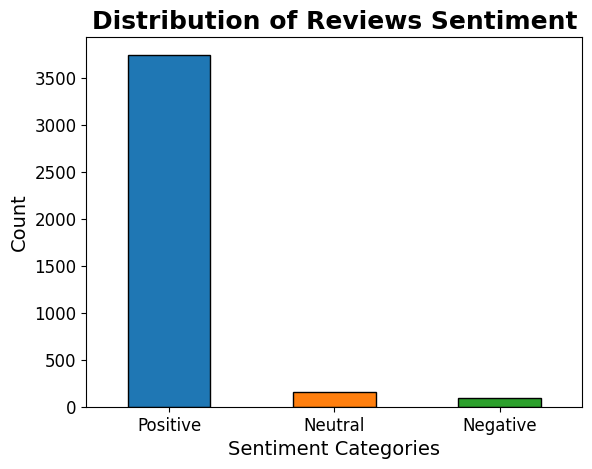

In [31]:
import matplotlib.pyplot as plt

# Define a list of colors to use for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting
data1['sentiment'].value_counts().plot(
    kind='bar',
    color=colors[:len(data1['sentiment'].unique())],  # Use colors based on the number of unique sentiments
    edgecolor='black'
)

# Adding title and labels
plt.title("Distribution of Reviews Sentiment", fontsize=18, fontweight='bold')
plt.xlabel("Sentiment Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Distribution of reviews sentiment
#In this plot the bar for the Positive category is the tallest, it indicates
#that most of the reviews have a favorable sentiment.

#Outliers or anomalies (e.g., extremely high counts for one category) might highlight significant trends, such as overwhelmingly positive or negative feedback during a specific period.


In [32]:
print(Positive.shape,Neutral.shape,Negative.shape)

(3749, 3) (158, 3) (93, 3)


#Applying Over Sampling

In [33]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
# Use fit_resample instead of fit_sample
X_res,Y_res=ros.fit_resample(X,Y)

In [34]:
from collections import Counter
print(sorted(Counter(Y_res).items()))

[('Negative', 3749), ('Neutral', 3749), ('Positive', 3749)]


In [35]:
X_res.shape,Y_res.shape

((11247, 1), (11247,))

In [36]:
#Checking out both old & new data
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({'Positive': 3749, 'Neutral': 158, 'Negative': 93})
Resampled dataset shape Counter({'Positive': 3749, 'Neutral': 3749, 'Negative': 3749})


In [37]:
#Creating X output to dataframe
X1=pd.DataFrame(X_res,columns=['Processed_Review'])

In [38]:
#Creating Y output to dataframe for merging
Y1=pd.DataFrame(Y_res,columns=['sentiment'])

In [39]:
#Merging the X & Y output to Final data
Final_data=pd.concat([X1,Y1],axis=1)
Final_data.head()

,Processed_Review,sentiment
0,purchase black fridaypros great price even sal...,Positive
1,purchase two amazon echo plus two dot plus fou...,Positive
2,average alexa option show thing screen still l...,Neutral
3,good product exactly want good price,Positive
4,rd one purchase buy one niece case compare one...,Positive


In [40]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11247 entries, 0 to 11246
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Processed_Review  11247 non-null  object
 1   sentiment         11247 non-null  object
dtypes: object(2)
memory usage: 175.9+ KB


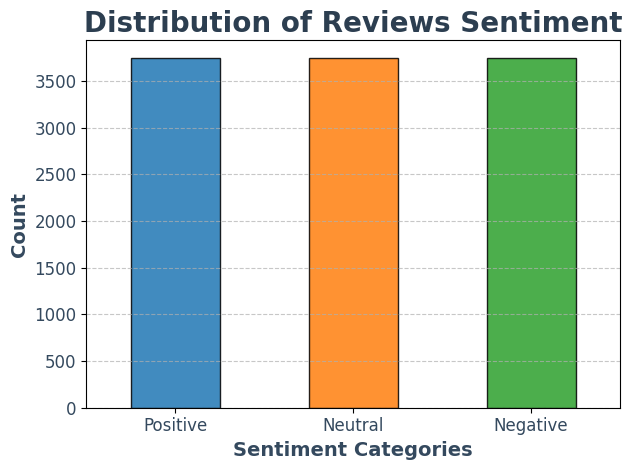

In [41]:
import matplotlib.pyplot as plt
# Plotting the sentiment distribution
Final_data['sentiment'].value_counts().plot(
    kind='bar',
    color=colors[:len(Final_data['sentiment'].unique())],  # Use unique colors based on sentiment categories
    edgecolor='black',
    alpha=0.85  # Add transparency for a smoother look
)

# Enhancing the plot
plt.title("Distribution of Reviews Sentiment", fontsize=20, fontweight='bold', color='#2C3E50')
plt.xlabel("Sentiment Categories", fontsize=14, fontweight='bold', color='#34495E')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='#34495E')
plt.xticks(rotation=0, fontsize=12, color='#34495E')
plt.yticks(fontsize=12, color='#34495E')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


# Balanced Distribution:
# Here all categories have similar counts, it shows an even spread of sentiments.

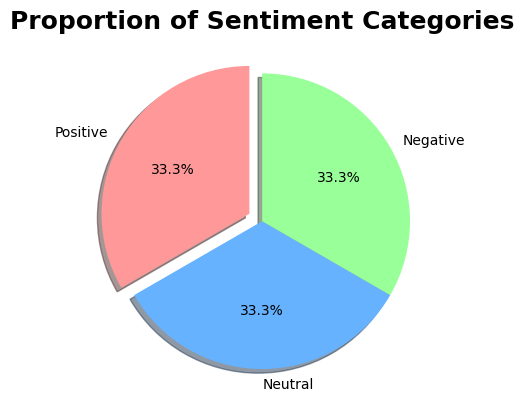

In [42]:
# Pie chart for sentiment distribution
colors = ['#FF9999', '#66B2FF', '#99FF99']
Final_data['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.1, 0, 0],  # Explode the first slice slightly
    shadow=True
)

plt.title("Proportion of Sentiment Categories", fontsize=18, fontweight='bold')
plt.ylabel("")  # Hide the y-label for better aesthetics
plt.show()


#Here Proportion of Sentiment Categories all are same Positive,Negative and Neutral.

In [43]:
df = Final_data.sample(frac=0.1, random_state=0)

# Dropping missing values
df.dropna(inplace=True)

df.head()# get the head of the dataset


,Processed_Review,sentiment
8805,buy think would great read book play game howe...,Neutral
9736,good tablet kid lot appts download game,Neutral
125,item work expect great product,Positive
10143,great beginner like child limit use many apps ...,Neutral
10937,buy kindle past time one come defective port b...,Neutral


#Train & Test Split Data

In [44]:
# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Review'], df['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

Load 1012 training examples and 113 validation examples. 

Show a review in the training set : 
 daughter love easy navigate hard break


#Bag of Words

The aim of this project is to classify the reviews into positive, neutral and negative sentiment.
There are two main steps which are involved:

We need to find word embedding to convert text into a numerical representation.
We fit the numerical representations of text to machine learning algorithms or deep learning architectures.
One common approach of word embedding is frequency based embedding viz Bag of Words (BoW) model. BoW model learns a vocabulary list from a given corpus and represents each document based on some counting methods of words. Here, we will explore the model performance using BoW with supervised learning algorithms.
Here's the workflow of this part.

Preprocess raw reviews to cleaned reviews.
Create BoW using CountVectorizer/Tfidfvectorizer in Sklearn.
Transform review text to numerical representations (feature vectors).
Fit feature vectors to supervised learning algorithm (Naive Bayes, Logistic regression, etc.).
Improve the model performance by GridSearch.

Bag of Words

The aim of this project is to classify the reviews into positive, neutral and negative sentiment.
There are two main steps which are involved:

We need to find word embedding to convert text into a numerical representation.
We fit the numerical representations of text to machine learning algorithms or deep learning architectures.
One common approach of word embedding is frequency based embedding viz Bag of Words (BoW) model. BoW model learns a vocabulary list from a given corpus and represents each document based on some counting methods of words. Here, we will explore the model performance using BoW with supervised learning algorithms.
Here's the workflow of this part.

Preprocess raw reviews to cleaned reviews.
Create BoW using CountVectorizer/Tfidfvectorizer in Sklearn.
Transform review text to numerical representations (feature vectors).
Fit feature vectors to supervised learning algorithm (Naive Bayes, Logistic regression, etc.).
Improve the model performance by GridSearch.
Text Preprocessing

The following text preprocessing methods are implemented to convert raw reviews to cleaned review making it easier to do feature extraction in the next step.

Remove non-character such as digits and symbols.
Convert to lower case.
Remove stop words such as "the" and "and" if needed.
Convert to root words by stemming if needed.

In [45]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))



In [46]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 daughter love easy navigate hard break


#CountVectorizer with Multinomial Naive Bayes (Benchmark Model)

Now as we have cleaned all reviews the next step is converting the reviews into numerical representations for a machine learning algorithm.

We will use CountVectorizer which implements both tokenization and occurrence counting in a single class provided by the Sklearn library. The output is a sparse matrix representation of the document.

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [48]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
                ):
       '''
       Convert a raw review to a cleaned review
       '''
       text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
       letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
       words = letters_only.lower().split() # convert to lower case

       if remove_stopwords: # remove stopword
           stops = set(stopwords.words("english"))
           words = [w for w in words if not w in stops]  # This line might be removing all words

       if stemming==True: # stemming
   #         stemmer = PorterStemmer()
           stemmer = SnowballStemmer('english')
           words = [stemmer.stem(w) for w in words]

       if split_text==True:  # split text
           return (words)

       return( " ".join(words))

In [49]:
countVect = CountVectorizer(min_df=1, max_df=1.0, token_pattern=r"(?u)\b\w+\b")

In [50]:
# Print or inspect X_train_cleaned after preprocessing
print(X_train_cleaned[:10])  # Print the first 10 cleaned reviews
print(len(X_train_cleaned))  # Check the length of the cleaned data

['disappoint toddler friendly kindle inside kid proof case set child lock etc big complaint game available connect internet want something take church car etc', 'little tweak install playstore without root great tablet excellent color fast battery last long time', 'kindle good download apps book catch read', 'review amazon seem awesome little know chronic problem port tablet buy christmas go charge first time nothing already load pay several apps money also charge cord come appear use wear edge go online see could find issue everywhere problem around year android ultimate culprit fail fix source plug charger click know place slide apple product several year never issue first droid product purchase even charge begin go back bestbuy buy another ipad mini cost much much reliable', 'purchase kindle daughter really enjoy use', 'regular fire tablet protective case', 'hi order daughter extensive like tablet didnt like lack google play service didnt patience work know o amazon specific despite

In [51]:
!pip install nltk
import nltk
nltk.download('stopwords')

# Your existing code to load the dataset and split into training and testing sets
# (including the train_test_split part)...


X_train_cleaned = []
for d in X_train:
    X_train_cleaned.append(cleanText(d, remove_stopwords=True)) # Call the updated cleanText function

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
countVect = CountVectorizer(min_df=1, max_df=1.0, token_pattern=r"(?u)\b\w+\b")

In [53]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer()
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names_out())) #6378
print("Show some feature names : \n", countVect.get_feature_names_out()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 1508 

Show some feature names : 
 ['ability' 'please']


MultinomialNB()

In [54]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [55]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

for d in X_test:
    X_test_cleaned.append(cleanText(d))

# Preprocess text data in testing set and validation set - This section was redundant and causing issue. Removed
#X_test_cleaned = []
#X_test_cleaned = []

#for d in X_test:
#    X_test_cleaned.append(cleanText(d))
#print('Show a cleaned review in the testing set : \n',  X_test_cleaned[10])

#for d in X_test:
#    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 daughter love easy navigate hard break


In [56]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8938

Classification report : 
               precision    recall  f1-score   support

    Negative       0.93      0.95      0.94        39
     Neutral       0.85      0.90      0.88        39
    Positive       0.91      0.83      0.87        35

    accuracy                           0.89       113
   macro avg       0.89      0.89      0.89       113
weighted avg       0.89      0.89      0.89       113


Confusion Matrix : 
 [[37  0  2]
 [ 3 35  1]
 [ 0  6 29]]


#TfidfVectorizer with Logistic Regression

Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.

In sklearn library we will use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.

In [57]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names_out())) #1722
print("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 691 

Show some feature names : 
 ['able']


LogisticRegression()

In [58]:
# Have a look at the top 10 features with the smallest and largest coefficients
feature_names = np.array(tfidf.get_feature_names_out()) # Changed to get_feature_names_out()
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with the smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with the largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with the smallest coefficients :
['love' 'easy' 'great' 'play' 'read' 'alexa' 'kid' 'price' 'well' 'ok']

Top 10 features with the largest coefficients : 
['return' 'update' 'bad' 'know' 'terrible' 'th' 'poor' 'try' 'minute'
 'youtube']


In [59]:
# Evaluating on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9292

Classification report : 
               precision    recall  f1-score   support

    Negative       0.93      1.00      0.96        39
     Neutral       0.88      0.92      0.90        39
    Positive       1.00      0.86      0.92        35

    accuracy                           0.93       113
   macro avg       0.94      0.93      0.93       113
weighted avg       0.93      0.93      0.93       113


Confusion Matrix : 
 [[39  0  0]
 [ 3 36  0]
 [ 0  5 30]]


# TfidfVectorizer with Linear SVM by using SGD

Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.

In sklearn library we will use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.

In [60]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names_out())) #1722
print("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

# SVM
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train_tfidf, y_train)


Number of features : 691 

Show some feature names : 
 ['able']


SGDClassifier()

In [61]:
feature_names_out = np.array(tfidf.get_feature_names_out())

In [62]:
# Have a look at the top 10 features with the smallest and largest coefficients
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = clf.coef_[0].argsort()
print('\nTop 10 features with the smallest coefficients :\n{}\n'.format(feature_names_out[sorted_coef_index[:10]]))
print('Top 10 features with the largest coefficients : \n{}'.format(feature_names_out[sorted_coef_index[:-11:-1]]))


Top 10 features with the smallest coefficients :
['overall' 'play' 'sometimes' 'easy' 'well' 'love' 'great' 'age' 'control'
 'definitely']

Top 10 features with the largest coefficients : 
['terrible' 'return' 'poor' 'exchange' 'minute' 'update' 'case' 'never'
 'th' 'bad']


In [63]:
# Evaluating on the validaton set
predictions = clf.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9204

Classification report : 
               precision    recall  f1-score   support

    Negative       0.95      1.00      0.97        39
     Neutral       0.84      0.97      0.90        39
    Positive       1.00      0.77      0.87        35

    accuracy                           0.92       113
   macro avg       0.93      0.92      0.92       113
weighted avg       0.93      0.92      0.92       113


Confusion Matrix : 
 [[39  0  0]
 [ 1 38  0]
 [ 1  7 27]]


# Using XGBoost Classifier

Some words might appear quite frequently but have a very less or negligible meaningful information about the sentiment for a particular review. Instead of using occurance counting we will use tf-idf transform to scale down the impact of frequently appearing words in a given corpus.

In sklearn library we will use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class

In [64]:
# XGBoost

from xgboost import XGBClassifier

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [66]:
def modelEvaluation(predictions, le):  # Add 'le' as an argument
    '''
    Print model evaluation to predicted result
    '''
    # Inverse transform predictions to original labels
    decoded_predictions = le.inverse_transform(predictions)

    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, decoded_predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, decoded_predictions)))  # Might need adjustments for AUC
    print("\nClassification report : \n", metrics.classification_report(y_test, decoded_predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, decoded_predictions))

# Pipeline and GridSearch

We will build a pipeline in the Sklearn library to streamline the workflow and use GridSearch on the pipeline model to implement hyperparameter tuning for both the vectorizer and classifier at once.

In [67]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training labels and transform them
y_train_encoded = le.fit_transform(y_train)

# Now, use the encoded labels for training
# Create an instance of XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train_encoded)

# When making predictions, you'll need to transform the test labels as well
y_test_encoded = le.transform(y_test)

# And then you can evaluate your model
predictions = xgb.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions,le)  # Assuming modelEvaluation handles encoded labels


Accuracy on validation set: 0.9292

Classification report : 
               precision    recall  f1-score   support

    Negative       0.95      0.97      0.96        39
     Neutral       0.90      0.95      0.93        39
    Positive       0.94      0.86      0.90        35

    accuracy                           0.93       113
   macro avg       0.93      0.93      0.93       113
weighted avg       0.93      0.93      0.93       113


Confusion Matrix : 
 [[38  0  1]
 [ 1 37  1]
 [ 1  4 30]]


In [68]:
# Building a pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 3], #min count of words
          "tfidf__max_features": [1000, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)  # Fitting with original string labels
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validation set
predictions = grid.predict(X_test_cleaned)

# Ensure that both predictions and y_test are in the same format (string)
# Remove label encoding parts as the pipeline doesn't need numeric labels

def modelEvaluation(predictions, y_test):  # Removed 'le' argument
    '''
    Print model evaluation to predicted result
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))  # Might need adjustments for AUC
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

# Now call modelEvaluation with string labels for both predictions and y_test
modelEvaluation(predictions, y_test)  # Passing original y_test

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9381

Classification report : 
               precision    recall  f1-score   support

    Negative       0.97      0.97      0.97        39
     Neutral       0.90      0.95      0.93        39
    Positive       0.94      0.89      0.91        35

    accuracy                           0.94       113
   macro avg       0.94      0.94      0.94       113
weighted avg       0.94      0.94      0.94       113


Confusion Matrix : 
 [[38  0  1]
 [ 1 37  1]
 [ 0  4 31]]


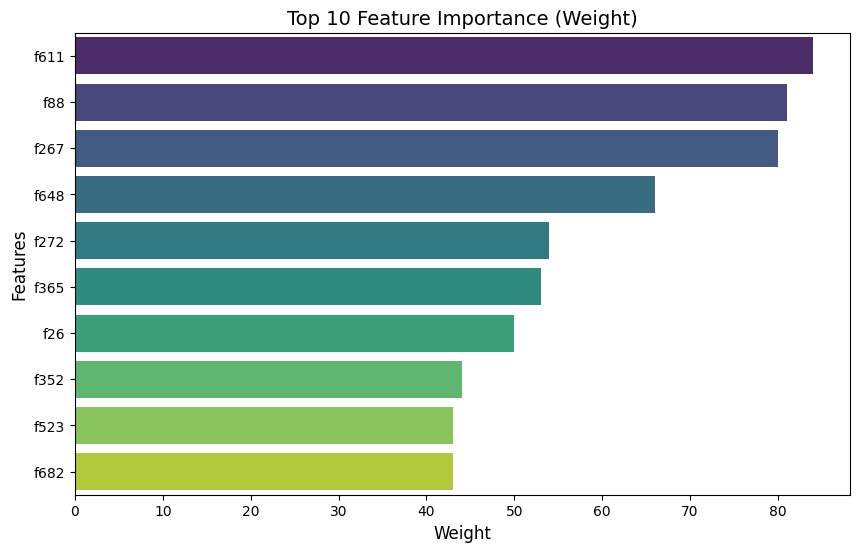

In [69]:
import pandas as pd
import seaborn as sns

# Assuming 'xgb' is the trained XGBoost model from cell 116
xgb_model = xgb  # Assign the trained model to xgb_model

# Extract feature importance
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Weight'])
importance_df = importance_df.sort_values(by='Weight', ascending=False).head(10)

# Plot feature importance as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Weight'], y=importance_df.index, palette='viridis')
plt.title("Top 10 Feature Importance (Weight)", fontsize=14)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

#The plot identifies the top 10 features that contribute the most to the model's decisions based on their usage in tree splits. These are likely to be the most influential variables in predicting the target variable.

#Relative Importance:
#The length of each bar in the plot represents the relative importance of each feature. Features with longer bars are used more frequently in splits, indicating higher importance.


In [70]:
# Extract all importance types
weight = xgb_model.get_booster().get_score(importance_type='weight')
gain = xgb_model.get_booster().get_score(importance_type='gain')
cover = xgb_model.get_booster().get_score(importance_type='cover')

# Create a DataFrame
importance_combined = pd.DataFrame({
    'Feature': weight.keys(),
    'Weight': weight.values(),
    'Gain': [gain.get(k, 0) for k in weight.keys()],
    'Cover': [cover.get(k, 0) for k in weight.keys()]
}).sort_values(by='Gain', ascending=False)

# Display the combined DataFrame
print(importance_combined.head(10))


    Feature  Weight       Gain       Cover
30      f78     1.0  17.977604  409.333313
33      f89     2.0  10.596786  314.366882
174    f567     1.0   9.478714  331.555542
162    f512     1.0   7.915997  327.627838
131    f408     1.0   7.855287  406.366608
163    f518     1.0   7.237122   22.666666
111    f357     4.0   6.119746  273.397552
133    f419    19.0   5.117416  223.300064
115    f365    53.0   4.992487  124.525703
177    f580     5.0   4.828111  257.942902


In [71]:
import numpy as np
feature_importances = xgb_model.feature_importances_[-1]  # Importance of the last feature
print(f"Importance of Sentiment Score: {feature_importances}")


Importance of Sentiment Score: 0.0


##Word2Vec

Another common approach of word embedding is the prediction based embedding like Word2Vec model. Briefly, Word2Vec is a combination of two techniques: Continuous Bag of Words (CBoW) and Skip-Gram model. Both are Shallow Neural Networks which learn weights for the word vector representations.

Here, we will train Word2Vec model to create our own word vector representation using gensim library. Then we will fit the feature vectors of the reviews to the Random Forest Classifier. Here's the workflow of this part: -

Parse review text to sentences (Word2Vec model takes a list of sentences as inputs).
Create vocabulary list using Word2Vec model.
Transform each review into numerical representation by computing average feature vectors of words therein
Fit the average feature vectors to Random Forest Classifier

Parsing Review into Sentences

Word2Vec model takes a list of sentences as inputs and outputs word vector representations for words in the vocabulary list created. Before we train the Word2Vec model, we have to parse reviews in the training set into sentences.

In [72]:
# Splitting review text into parsed sentences using NLTK's punkt tokenizer
import nltk

# Download the 'punkt' data
nltk.download('punkt_tab')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)

print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


1012 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['daughter', 'love', 'easy', 'navigate', 'hard', 'break']


#Creating Vocabulary List using Word2Vec Model

As we have a set of cleaned and parsed sentences from the training data, we will train our own word vector representations by specifying the embedding dimension (= length of feature vector)

In [73]:
# Fitting parsed sentences to Word2Vec model

num_features = 300  # embedding dimension
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model ...\n")
# Replace 'size' with 'vector_size'
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count,
                 window=context, sample=downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context")  # save trained word2vec model

# Use 'index_to_key' instead of 'index2word'
print("Number of words in the vocabulary list : %d \n" % len(w2v.wv.index_to_key))  # 4016
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v.wv.index_to_key[0:10])

Training Word2Vec model ...



Number of words in the vocabulary list : 416 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['buy', 'tablet', 'use', 'good', 'great', 'work', 'get', 'one', 'amazon', 'kindle']


# Averaging Feature Vectors

Now we have created a vocabulary list of words with each word having a word representation(ie. feature vector of dim 300).

To find a numerical representation for a review, we run through each word in a review text. For words appear in the vocabulary list, we compute the average feature vectors of all those words. The average feature vector is the numerical represenation of the review.

In [74]:
# Transfroming the training data into feature vectors

def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words
    appeared in that review and in the vocabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the vocabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [75]:
def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words
    appeared in that review and in the vocabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    # Replace 'index2word' with 'index_to_key'
    index2word_set = set(model.wv.index_to_key) #index_to_key is the vocabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model.wv[word]) # Access word vectors using wv[word]
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [76]:
# Getting feature vectors for training set
trainVector = getAvgFeatureVecs(X_train, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)

# Getting feature vectors for validation set
testVector = getAvgFeatureVecs(X_test, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

Training set : 1012 feature vectors with 300 dimensions
Validation set : 113 feature vectors with 300 dimensions


#Random Forest Classifer

We will now train the Random Forest Classifier using feature vectors of reviews in the training set.

In [77]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions, y_test) # Added y_test as an argument


Accuracy on validation set: 0.7699

Classification report : 
               precision    recall  f1-score   support

    Negative       0.79      0.87      0.83        39
     Neutral       0.74      0.79      0.77        39
    Positive       0.79      0.63      0.70        35

    accuracy                           0.77       113
   macro avg       0.77      0.77      0.76       113
weighted avg       0.77      0.77      0.77       113


Confusion Matrix : 
 [[34  3  2]
 [ 4 31  4]
 [ 5  8 22]]


#Applying LSTM

Long Short Term Memory(LSTM) Networks are a special kind of the Recurrent Neural Networks(RNN) capable of learning long-term dependencies. LSTM can be very useful in text mining problems as it involves dependencies in the sentences which can be caught in the "memory" of the LSTM. Here, we will train a simple LSTM and LSTM with Word2Vec embedding for classifying the reviews into positive and negative sentiments using Keras library.

Simple LSTM

We need to preprocess the text data to 2D tensor before we begin fitting it into a simple LSTM. Firstly we will tokenize the corpus by considering only top words (top_words = 20000) and transforming reviews to numerical sequences using the trained tokenizer. Lastly we will make it sure that all the numerical sequences have the same length (maxlen=100) for modelling by truncating the long reviews and padding shorter reviews having zero values.

For constructing a simple LSTM, we will use embedding class in Keras to building up the first layer. This embedding layer converts numerical sequence of words into a word embedding. We should also note that the embedding class provides a convenient way to map discrete words into a continuous vector space but it doesn't take the semantic similarity of the words into account. The next layer is the LSTM layer with 128 memory units. Finally, we will use a dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 prediction for the two classes (positive sentiment and negative sentiment). As it is a binary classification problem log loss is used as the loss function(binary_crossentropy in Keras). ADAM optimization algorithm will be used.

Here's the workflow in this part: -

Prepare X_train and X_test to 2D tensor.
Train a simple LSTM (embedding layer => LSTM layer => dense layer).
Compile and fit the model using log loss function and ADAM optimizer.

In [78]:
df = Final_data.sample(frac=0.1, random_state=0)

# Drop missing values
df.dropna(inplace=True)

# Convert the sentiments
df.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)

df.head()

,Processed_Review,sentiment
8805,buy think would great read book play game howe...,2
9736,good tablet kid lot appts download game,2
125,item work expect great product,1
10143,great beginner like child limit use many apps ...,2
10937,buy kindle past time one come defective port b...,2


In [79]:

# Splitting data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Review'], df['sentiment'], \
                                                    test_size=0.1, random_state=1)


In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer # Importing Tokenizer
from tensorflow.keras.preprocessing import sequence # Importing sequence

# Instead of importing as np_utils, import to_categorical directly
from tensorflow.keras.utils import to_categorical
top_words = 20000
maxlen = 100
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(num_words=top_words) #Considering only top 20000 words in the corpus # Updated nb_words to num_words
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# One-Hot Encoding of y_train and y_test
y_train_seq =to_categorical(y_train, nb_classes)
y_test_seq =to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

X_train shape: (1012, 100)
X_test shape: (113, 100)
y_train shape: (1012, 3)
y_test shape: (113, 3)


In [81]:
from tensorflow.keras.models import Sequential  # Import Sequential from keras.models
from tensorflow.keras.layers import Dropout, Embedding, LSTM, Dense, Activation # Import necessary layers


# Constructing a Simple LSTM
model1 = Sequential()
model1.add(Embedding(top_words, 128)) # Remove dropout argument
model1.add(Dropout(0.2)) # Add a Dropout layer after Embedding
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()
# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Replace 'nb_epoch' with 'epochs' in the fit() method call
model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model Evaluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.3792 - loss: 0.6614
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.6575 - loss: 0.5841
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.8054 - loss: 0.3387
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7805 - loss: 0.3267
Test loss : 0.2987
Test accuracy : 0.8053


# LSTM with Word2Vec Embedding

In the simple LSTM model constructed above, the embedding class in Keras comes in handy for converting the numerical sequence of words into a word embedding but it doesn't take the semantic similarity of the words into account. The model assigns random weights to the embedding layer and learn the embeddings by minimizing the global error of the network.

Instead of using random weights we will use pretrained word embeddings for initializing the weight of an embedding layer. Here, we will use the Word2Vec embedding trained in Part 4 for intializing the weights of embedding layer in LSTM.

Load pretrained word embedding model.
Construct embedding layer using embedding matrix as weights.
Train a LSTM with Word2Vec embedding (embedding layer => LSTM layer => dense layer).
Compile and fit the model using log loss function and ADAM optimizer.

In [82]:
# Loading pretrained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")

# Getting Word2Vec embedding matrix
# Replace 'syn0' with 'vectors' or use direct indexing
embedding_matrix = w2v.wv.vectors  # Accessing the word vectors directly
# OR
# embedding_matrix = w2v.wv['word']  # Accessing the vector for a specific word 'word'

print("Shape of embedding matrix : ", embedding_matrix.shape) #(4016, 300) = (vocabulary size, embedding dimension)
# w2v.wv.syn0[0] #feature vector of the first word in the vocabulary list

Shape of embedding matrix :  (416, 300)


In [83]:
from tensorflow.keras.utils import to_categorical

In [84]:
top_words = embedding_matrix.shape[0] #4016
maxlen = 100
batch_size = 32
nb_classes = 3
nb_epoch = 3


# Vectorizing X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)

# One-Hot Encoding of y_train and y_test
# Use to_categorical directly
y_train_seq = to_categorical(y_train, nb_classes)
y_test_seq = to_categorical(y_test, nb_classes)



print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

X_train shape: (1012, 100)
X_test shape: (113, 100)
y_train shape: (1012, 3)
y_test shape: (113, 3)


In [85]:
# Import necessary libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation

# Loading pretrained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")

# Getting Word2Vec embedding matrix
embedding_matrix = w2v.wv.vectors

# Define embedding_layer using the embedding matrix
embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
                            output_dim=embedding_matrix.shape[1],
                            weights=[embedding_matrix],
                            trainable=False)

In [86]:
# Constructing LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Use dropout and recurrent_dropout
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compiling model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Replace nb_epoch with epochs for newer Keras versions
model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │         124,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,800 (487.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 124,800 (487.50 KB)

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.2886 - loss: 0.6547
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.3012 - loss: 0.6388
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.3470 - loss: 0.6401
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3301 - loss: 0.6348
Test loss : 0.6359
Test accuracy : 0.3097


In [87]:
# Getting weight matrix of the embedding layer
print("Size of weight matrix in the embedding layer : ", \
      model2.layers[0].get_weights()[0].shape) #(20000, 128)

# Getting weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
      model2.layers[1].get_weights()[0].shape) #(128, 512)  weight dim of LSTM - w

# Getting weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
      model2.layers[2].get_weights()[0].shape) #(128, 2) weight dim of dense layer

Size of weight matrix in the embedding layer :  (416, 300)
Size of weight matrix in the hidden layer :  (300, 512)
Size of weight matrix in the output layer :  (128, 3)


#Optional Tasks: Topic Modelling

Latent Dirichlet Allocation(LDA)

In [88]:
import nltk# import liabriries
nltk.download('wordnet')

doc_complete = data2["Processed_Review"].tolist()
doc_clean = [cleanText(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
import gensim# import libraries
from gensim import corpora

In [90]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)


Dictionary<3415 unique tokens: ['able', 'access', 'accomplish', 'ad', 'add']...>


In [91]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1)],
 [(6, 1),
  (26, 2),
  (34, 1),
  (35, 4),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(35, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 

In [92]:
from gensim.models import LdaModel

In [93]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)

In [94]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.054*"recommend" + 0.042*"would" + 0.040*"one" + 0.039*"get" + 0.031*"buy" + 0.024*"product" + 0.017*"love" + 0.015*"definitely" + 0.014*"highly" + 0.014*"child"')

(1, '0.035*"echo" + 0.030*"alexa" + 0.021*"music" + 0.021*"show" + 0.020*"love" + 0.019*"great" + 0.016*"home" + 0.015*"device" + 0.014*"amazon" + 0.013*"use"')

(2, '0.025*"good" + 0.015*"make" + 0.014*"price" + 0.013*"amazon" + 0.011*"use" + 0.010*"however" + 0.010*"one" + 0.010*"generation" + 0.010*"size" + 0.009*"buy"')

(3, '0.035*"tablet" + 0.031*"old" + 0.031*"love" + 0.029*"year" + 0.028*"buy" + 0.021*"game" + 0.020*"play" + 0.017*"kid" + 0.012*"apps" + 0.012*"one"')

(4, '0.093*"tablet" + 0.073*"great" + 0.035*"price" + 0.027*"love" + 0.020*"buy" + 0.020*"work" + 0.018*"kid" + 0.016*"amazon" + 0.015*"purchase" + 0.014*"gift"')

(5, '0.038*"read" + 0.019*"good" + 0.018*"really" + 0.018*"charge" + 0.016*"thing" + 0.016*"would" + 0.015*"like" + 0.013*"light" + 0.012*"go" + 0.011*"buy"')

(6, '0.099*"easy" + 0.08

In [95]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [96]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,recommend,echo,good,tablet,tablet,read,easy,kindle,good
1,would,alexa,make,old,great,good,use,read,sound
2,one,music,price,love,price,really,love,fire,quality
3,get,show,amazon,year,love,charge,great,book,echo
4,buy,love,use,buy,buy,thing,set,love,great
5,product,great,however,game,work,would,gift,light,video
6,love,home,one,play,kid,like,work,much,picture
7,definitely,device,generation,kid,amazon,light,buy,screen,screen
8,highly,amazon,size,apps,purchase,go,purchase,use,work
9,child,use,buy,one,gift,buy,product,like,speaker


In [97]:
ldamodel.show_topic(0, topn = 20)

[('recommend', 0.053820796),
 ('would', 0.042001102),
 ('one', 0.040325664),
 ('get', 0.038892936),
 ('buy', 0.030908344),
 ('product', 0.024059441),
 ('love', 0.016832937),
 ('definitely', 0.015209314),
 ('highly', 0.014387245),
 ('child', 0.014204701),
 ('friend', 0.013836865),
 ('good', 0.013697676),
 ('time', 0.011382728),
 ('family', 0.01077979),
 ('anyone', 0.009399581),
 ('best', 0.009070618),
 ('screen', 0.0089455815),
 ('want', 0.008930281),
 ('kid', 0.008909119),
 ('great', 0.008857678)]

In [98]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 52.0 MB/s eta 0:00:00


# Displaying Results & Getting Insights

In [99]:
import pyLDAvis.gensim

In [100]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Creating a Wordcloud

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


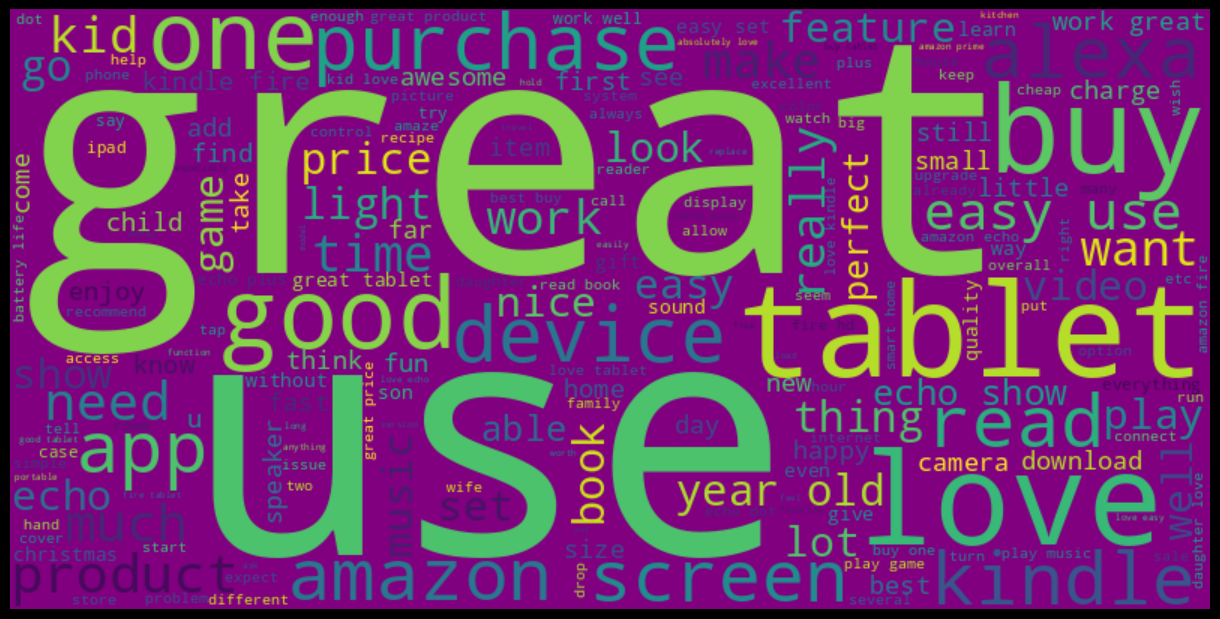

In [101]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all processed reviews into one text
txt = " ".join(data2["Processed_Review"].values)

# Define a colorful colormap and generate the word cloud
wc = WordCloud(
    width=800,                # Increased width for better resolution
    height=400,               # Increased height for better resolution
    background_color="Purple", # Background color
    stopwords=STOPWORDS,      # Remove stop words
    colormap="viridis",       # Color map for more vibrant colors ('plasma', 'cool', 'rainbow' also work)
    max_words=200,            # Maximum number of words to display
    contour_width=2,          # Add a border around the words
    contour_color='steelblue' # Border color
).generate(txt)

# Plot the word cloud
plt.figure(figsize=(12, 8), facecolor='k', edgecolor='w')  # Set figure size and no facecolor
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Turn off axes
plt.tight_layout(pad=0)  # Remove padding
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
